In [23]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv("test.csv", skiprows=[1])
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203273 entries, 0 to 203272
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   time       203273 non-null  object 
 1   longitude  203273 non-null  float64
 2   latitude   203273 non-null  float64
 3   depth      203273 non-null  int64  
 4   T          124588 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 7.8+ MB
None


In [39]:
df = pd.read_csv("test.csv",nrows=2)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203273 entries, 1 to 203273
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   time       203273 non-null  object
 1   longitude  203273 non-null  object
 2   latitude   203273 non-null  object
 3   depth      203273 non-null  object
 4   T          124588 non-null  object
dtypes: object(5)
memory usage: 7.8+ MB


C:\Users\nanxi\AppData\Local\Temp\ipykernel_42608\180712999.py:1: DtypeWarning: Columns (1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("test.csv")


In [24]:
df_pivot = df.pivot(index='latitude', columns='longitude', values='T')

In [3]:
# 假设你的数据在一个名为df的pandas DataFrame中
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 203273 entries, 0 to 203272
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   time       203273 non-null  object  
 1   longitude  203273 non-null  float64 
 2   latitude   203273 non-null  float64 
 3   depth      203273 non-null  int64   
 4   Salinity   122035 non-null  float64 
 5   geometry   203273 non-null  geometry
dtypes: float64(3), geometry(1), int64(1), object(1)
memory usage: 9.3+ MB


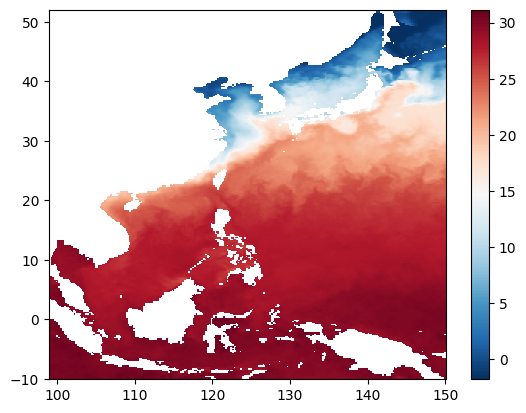

In [25]:
# 创建一个新的figure和axes
fig, ax = plt.subplots()

# 使用pcolormesh绘制地图
# 然后你可以使用df_pivot作为pcolormesh的输入
c = ax.pcolormesh(df_pivot.columns.values,
                  df_pivot.index.values, df_pivot.values, cmap='RdBu_r')

# 添加一个colorbar
fig.colorbar(c, ax=ax)

# 显示地图
plt.show()

TypeError: Dimensions of C (0, 409) should be one smaller than X(410) and Y(0) while using shading='flat' see help(pcolormesh)

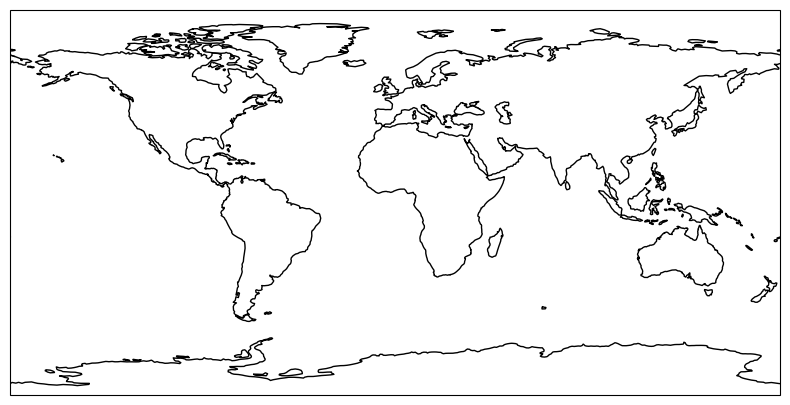

In [12]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

# 假设你的数据在一个名为df的pandas DataFrame中
df_pivot.dropna(inplace=True)

# 创建一个地图
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()

# 使用pcolormesh绘制数据
c = ax.pcolormesh(df_pivot.columns.values,
                  df_pivot.index.values, df_pivot.values,
                  transform=ccrs.PlateCarree(), cmap='RdBu_r')

# 添加一个colorbar
fig.colorbar(c, ax=ax, orientation='vertical')

# 显示地图
plt.show()

In [61]:
df_pivot.to_numpy()

array([[30.3175, 30.29  , 30.325 , ...,     nan, 30.72  , 30.5   ],
       [30.315 , 30.3   , 30.34  , ...,     nan, 30.72  , 30.625 ],
       [30.3175, 30.295 , 30.3225, ...,     nan, 30.47  , 30.51  ],
       ...,
       [    nan,     nan,     nan, ..., -1.7025, -1.675 , -1.625 ],
       [    nan,     nan,     nan, ..., -1.705 , -1.68  , -1.625 ],
       [    nan,     nan,     nan, ..., -1.7125, -1.69  , -1.6375]])

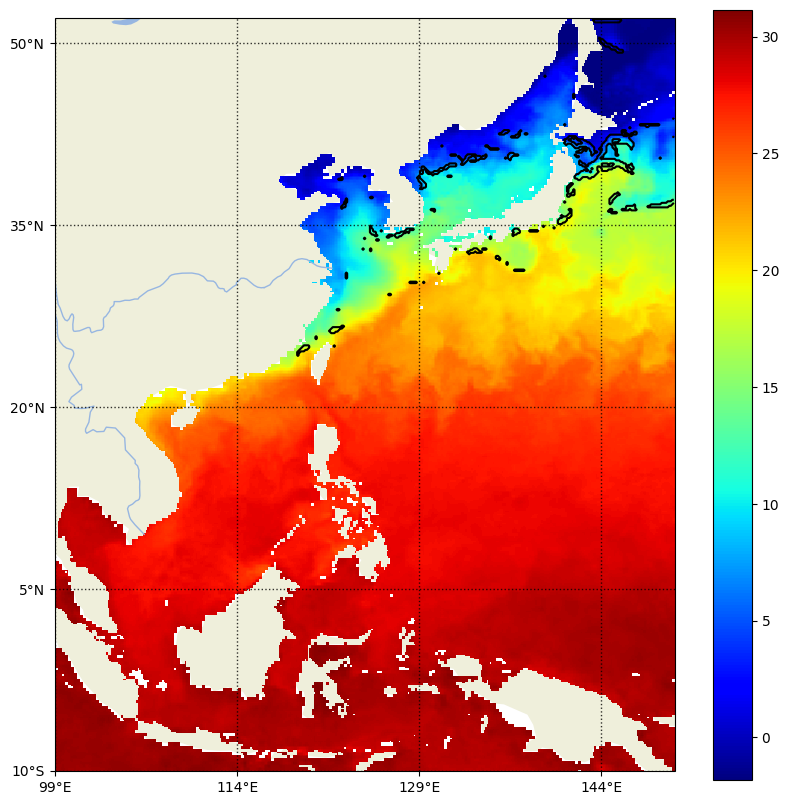

In [70]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
# 假设你的数据在一个名为df的pandas DataFrame中
# df_pivot.dropna(inplace=True)


# 创建一个地图

fig = plt.figure(figsize=(10, 10))



ax=plt.axes(projection=ccrs.PlateCarree())

# 添加地图特征，例如海岸线、河流等

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)

# 使用pcolormesh绘制数据
c = ax.pcolormesh(df_pivot.columns.values,
                  df_pivot.index.values, df_pivot.values,
                  transform=ccrs.PlateCarree(), cmap='jet')

# 添加一个colorbar
fig.colorbar(c, ax=ax, orientation='vertical')

x = df_pivot.columns.values
y = df_pivot.index.values

num_ticks=5


#设置刻度
xticks = df_pivot.columns.values[::8*15]
yticks = df_pivot.index.values[::8*15]

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  linewidth=1, linestyle=':', color='k', alpha=0.8)
gl.xlocator = mticker.FixedLocator(xticks)
gl.ylocator = mticker.FixedLocator(yticks)

ax.set_xticks(xticks, crs=ccrs.PlateCarree())
ax.set_yticks(yticks, crs=ccrs.PlateCarree())

ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
ax.yaxis.set_major_formatter(LatitudeFormatter())
# 计算温度的梯度
gradient_y, gradient_x = np.gradient(df_pivot.to_numpy())
# 找出梯度较大的点，这里我们假设梯度大于1的点为梯度较大的点
large_gradient_points = np.sqrt(gradient_x**2 + gradient_y**2) > 1

ax.contour(x, y, large_gradient_points, colors='black')
plt.savefig("output.png")